<a href="https://colab.research.google.com/github/13693763686/data-analysis/blob/master/scikit-learn%20notebooks/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#特征工程

In [1]:
#现实的业务数据通常都是高维的数据，高维的数据本身计算量大，并且会混入大量的噪声
#机器学习建模一定要进行特征工程，对特征进行处理
#特征工程包括特征提取，特征创造和特征选址
#特征提取是从非结构化的数据中提取特征，特征创造是利用已有的数据进行衍生得到
#特征选择是指从特征中选择有意义的特征

In [2]:
#数据预处理的过程包括
#缺失值，异常值，量纲统一，离散化，分类的编码，标签的编码
#这些过程在前面的案例中已经考虑过，故在此不再重复
#下面主要展示特征工程中特征选择的过程

##特征选择

###读入数据，分离特征和标签

In [22]:
import pandas as pd
data = pd.read_csv("digit recognizor.csv")
data.dropna(inplace=True)

In [23]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

###特征过滤

####数值过滤方法

In [6]:
#特征过滤的思想很简单，利用数据本身的信息，消去方差很小的数据，这意味着它们对标签的解释没有贡献，类似于PCA，以方差作为衡量标准
#通过方差过滤和描述性统计，也可以很轻易地实现留下一定数量的列
#相关性过滤的话直接考虑特征列与标签列的相关关系
#过滤方法包括卡方过滤，F检验，互信息，这三种方法都是基于统计理论的

####embedded嵌入法

In [7]:
#上述的统计特性的过滤方法相对还是太过简单，嵌入法是更加复杂的方法
#嵌入法利用将要建模的模型所带的权重进行筛选过滤，更好地同模型结合

In [8]:
#下面演示随机森林的嵌入法

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

In [25]:
rfc = RFC(n_estimators=10,random_state=100)
X_embedded = SelectFromModel(rfc,threshold=0.005).fit_transform(X,y)

In [27]:
#观察到经过一次的选择，特征由784个降维到了51个
X_embedded.shape

(42000, 51)

In [30]:
#经常用的招数，利用学习曲线，把区间变窄，选出更好的参数
import numpy as np
import matplotlib.pyplot as plt
rfc.fit(X,y).feature_importances_
threshold = np.linspace(0,(rfc.fit(X,y).feature_importances_).max(),20)

In [ ]:
threshold

In [36]:
score = []
for i in threshold:
  X_embedded = SelectFromModel(rfc,threshold=i).fit_transform(X,y)
  once = cross_val_score(rfc,X_embedded,y,cv=5).mean()
  score.append(once)


NameError: ignored

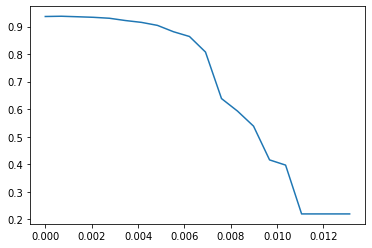

In [37]:
plt.plot(threshold,score)
plt.show()
  

In [38]:
#wrapper包装法，特征的选择过程是多次进行的，而不是单次的决定，即特征的选择需要另一个算法来处理
#下面以比较简单的递归特征消除为例

In [39]:
from sklearn.feature_selection import RFE
#n_features_to_select指最终要保留的特征的个数，step指每步要减少的特征数
selector = RFE(rfc,n_features_to_select=340,step=50).fit(X,y)

In [41]:
#selector.support_返回特征是否被选中的布尔矩阵
selector.support_.sum()

340

In [44]:
#返回每一个特征最终所处于的迭代轮数，从而反应整体的分数
pd.Series(selector.ranking_).value_counts()

1     340
10     50
9      50
8      50
7      50
6      50
5      50
4      50
3      50
2      44
dtype: int64